In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Customer Churn Data Analysis

## Data Overview

This report will outline the process taken for choosing a model regarding customer churn within Telco. The dataset I will be working with is the Telco Customer Churn set. The set uses various demographic information about the users --- such as gender, partner status, age, and dependents--- and their service information --- such as, Internet usage/accessibility, Online Security, and streaming usage. These factors can ultimately impact the rate at which customers are likely to leave the company. This metric is known as churn. 

Since churn is a binary metric where the outputs are simply churned or didn't churn, the goal of this exploration is to predict who will churn. In addition, I will also explore the traits of those who churn as to better interpret the results.

## Cleaning

This specific dataset need several aspects to be cleaned before it can be put into a classification algorithm. This includes replacing missing data, encoding data and skewed classes.


In [3]:
df = pd.read_csv('Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns.value_counts()

customerID          1
DeviceProtection    1
TotalCharges        1
MonthlyCharges      1
PaymentMethod       1
PaperlessBilling    1
Contract            1
StreamingMovies     1
StreamingTV         1
TechSupport         1
OnlineBackup        1
gender              1
OnlineSecurity      1
InternetService     1
MultipleLines       1
PhoneService        1
tenure              1
Dependents          1
Partner             1
SeniorCitizen       1
Churn               1
dtype: int64

## Missing Data

In [3]:
df.nunique()
#2 opt: gender, senior, partner, dependents, phoneserv, paperless bill, churn
#combine to 2: multilines, online sec, online backup, dev prot, tech supp, stream tv, stream movies
#3+ opt: Internet serv, contract, payment method--> combine into auto v. manual, 
#alr num: tenure, month charge, total charge
#just delete: customerid,
df.isnull().sum() #none
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
##2 option data

df = pd.get_dummies(data=df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'], drop_first=True)
df = df.rename(columns={'Partner_Yes': 'Partner', 'Dependents_Yes':'Dependents', 'PhoneService_Yes':'PhoneService', 'PaperlessBilling_Yes':'PaperlessBilling'})


In [5]:
##multioption data
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df[['InternetService', 'Contract', 'PaymentMethod']] = df[['InternetService', 'Contract', 'PaymentMethod']].apply(lbe.fit_transform)


## Data Encoding

The majority of the preprocessing of this dataset is encoding the data in various ways. I organized the features into the three categories. First, features that already only had 2 choices. Second, features that have multiple labels and need to be label encoded. Finally, features that have multiple labels that boil down to two options. For example, the feature 'OnlineSecurity' has the potential to be 'Yes', 'No', or 'No Internet Service'. In cases like this, we will remove the excess option and leave just the binary. Below are the encoding categories and their respective features.

In [6]:
###Combining
#comb_df = df[['MultipleLines', 'OnlineSecurity', 'OnlineProtection', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
df['MultipleLines']= (df['MultipleLines']=='Yes').astype(int)
df['OnlineSecurity']= (df['OnlineSecurity']=='Yes').astype(int)
df['DeviceProtection']= (df['DeviceProtection']=='Yes').astype(int)
df['TechSupport']= (df['TechSupport']=='Yes').astype(int)
df['StreamingTV']= (df['StreamingTV']=='Yes').astype(int)
df['StreamingMovies']= (df['StreamingMovies']=='Yes').astype(int)
df['OnlineBackup']= (df['OnlineBackup']=='Yes').astype(int)

In [7]:
##delete
df = df.drop('customerID', axis=1)

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'].iloc[488]

0

In [9]:
cols = df.columns.tolist()
cols = cols[0:15] + cols[16:-1] + cols[15:16]
df = df[cols]
df['Churn'] = (df['Churn']=='Yes').astype(int)

In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y= df.iloc[:, -1:]


## Unbalanced Classes

Text(0, 0.5, 'Count')

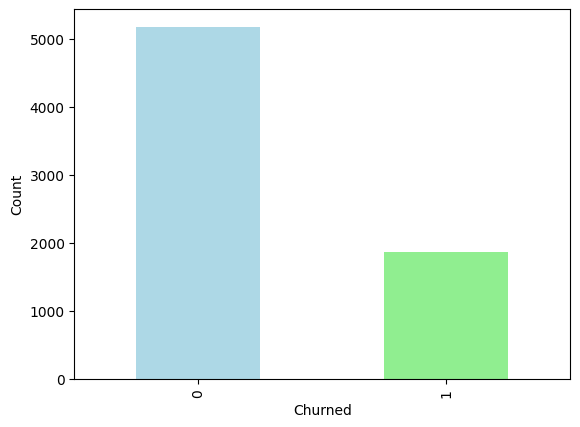

In [11]:
ax = df['Churn'].value_counts().plot.bar(color = ['lightblue', 'lightgreen'])
ax.set_xlabel('Churned')
ax.set_ylabel('Count')


# Feature Correlations

C:\Users\HP\AppData\Local\Temp\ipykernel_25392\4180079517.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df.corr(), annot=True, cmap='jet')


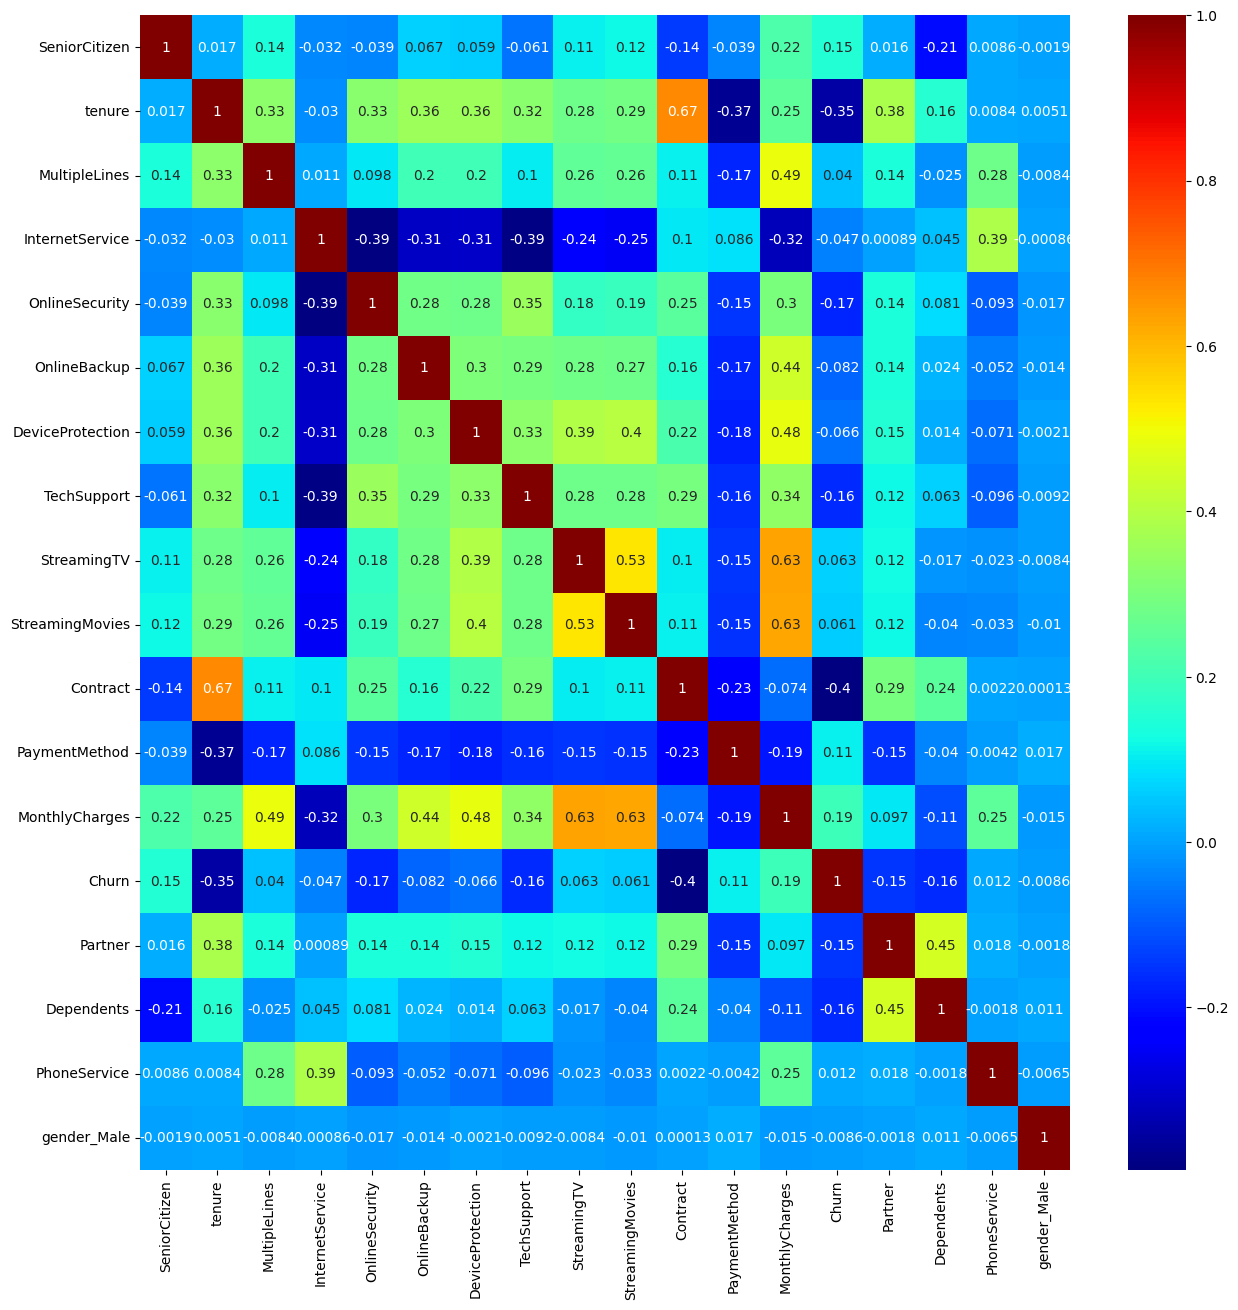

In [12]:
ax=plt.figure(figsize=(15, 15))
ax=sns.heatmap(df.corr(), annot=True, cmap='jet')

In [13]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.set_output(transform='pandas')

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.head()


,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,PhoneService
5110,-0.441308,-0.986057,1.180838,0.16730,-0.628602,-0.720504,-0.727794,-0.643870,-0.787557,-0.795784,-0.828184,0.402840,0.293164,-0.722673,-0.606955,-0.969786,-0.654772,0.326915
6335,-0.441308,-0.741911,-0.846856,-1.18596,-0.628602,-0.720504,-0.727794,1.553108,1.269750,1.256623,-0.828184,0.402840,0.165639,-0.595346,-0.606955,-0.969786,-0.654772,0.326915
4612,-0.441308,1.333323,-0.846856,-1.18596,-0.628602,1.387918,-0.727794,1.553108,1.269750,-0.795784,1.571415,1.335678,-0.642571,0.290723,-0.606955,-0.969786,1.527250,-3.058899
355,-0.441308,-0.904675,-0.846856,0.16730,-0.628602,-0.720504,-0.727794,-0.643870,-0.787557,1.256623,-0.828184,-1.462835,0.516746,-0.628542,1.647570,-0.969786,-0.654772,0.326915
4093,-0.441308,-0.131548,1.180838,0.16730,-0.628602,-0.720504,-0.727794,-0.643870,-0.787557,-0.795784,-0.828184,-0.529997,0.375972,-0.025700,-0.606955,-0.969786,-0.654772,0.326915


In [14]:
df['tenure']= pd.to_numeric(df['tenure'])
df['MonthlyCharges']= pd.to_numeric(df['MonthlyCharges'])
df['TotalCharges']= pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].value_counts()

0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

### Modeling

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Grid search hyperparameters for a logistic regression model
def grid_search_lr(X_train, y_train):
    params_grid = {
    'class_weight': [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
    }
    lr_model = LogisticRegression(random_state=rs, max_iter=1000)
    grid_search = GridSearchCV(estimator = lr_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

In [16]:
rs = 123
# Build a logistic regression model
def build_lr(X_train, y_train, X_test, threshold=0.5, best_params=None):
    
    model = LogisticRegression(random_state=rs, 
                              max_iter = 1000)
    # If best parameters are provided
    if best_params:
        model = LogisticRegression(penalty = 'l2',
                              random_state=rs, 
                              max_iter = 1000,
                              class_weight=best_params['class_weight'])
    # Train the model
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

In [17]:
from sklearn.ensemble import RandomForestClassifier
def build_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):
    
    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = best_params['bootstrap'],
                                   # Max depth of each tree
                                   max_depth = best_params['max_depth'],
                                   # Class weight parameters
                                   class_weight=best_params['class_weight'],
                                   # Number of trees
                                   n_estimators=best_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=best_params['min_samples_split'])
    # Train the model   
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

In [18]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

In [19]:
from sklearn.model_selection import GridSearchCV
def grid_search_rf(X_train, y_train):
    params_grid = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [25, 50, 100, 125],
    'min_samples_split': [2, 3, 5],
    'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}]
    }
    rf_model = RandomForestClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
def resample(X_train, y_train):
    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = 123)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=123)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    return X_smo, y_smo, X_under, y_under

#### Model 1: Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)
results = evaluate(y_test, y_preds_lr, 'Log Reg OG')
results

In [21]:
grid_search_lr(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning

{'class_weight': {0: 0.05, 1: 0.95}}

In [24]:
lr_preds, lr_model = build_lr(X_train, y_train, X_test, best_params={'class_weight': {0:0.05, 1:0.95}})
results = evaluate(y_test, lr_preds, 'Log Reg Mod')
results

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'type': 'Log Reg Mod',
 'accuracy': 0.5070982396365701,
 'recall': 1.0,
 'auc': 0.5,
 'precision': 0.5070982396365701,
 'fscore': 0.9639624678236319}

Text(0.5, 1.0, 'Feature Importance in Customer Churn')

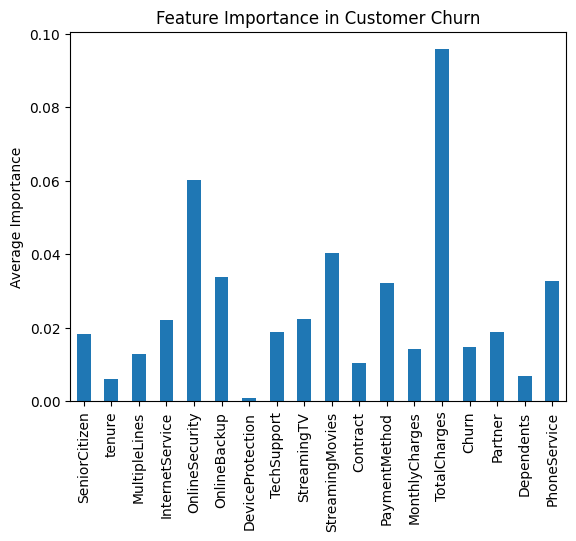

In [27]:
coeffs = lr_model.coef_[0]

lr_importances = pd.Series(np.abs(coeffs), index=X_train.columns)

fig, ax = plt.subplots()
lr_importances.plot.bar(ax=ax)
ax.set_ylabel('Average Importance')
ax.set_title('Feature Importance in Customer Churn')

#### Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_preds_rf = rfc.predict(X_test)
results = evaluate(y_test, y_preds_rf, 'RandomForest OG')
results

In [28]:
grid_search_rf(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\HP\AppData\Local\Programs\Python\Python39\l

{'class_weight': {0: 0.3, 1: 0.7},
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 25}

In [36]:
rf_preds, rf_model = build_rf(X_train, y_train, X_test, best_params={'bootstrap': True,
                         'class_weight': {0:0.3, 1:0.7}, 
                         'max_depth': 5, 
                         'min_samples_split': 2, 
                         'n_estimators': 25})
result = evaluate(y_test, rf_preds, 'RandomForest')

C:\Users\HP\AppData\Local\Temp\ipykernel_25392\414253802.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [30]:
result

{'type': 'RandomForest',
 'accuracy': 0.5082339579784213,
 'recall': 0.9988801791713325,
 'auc': 0.5011682001847446,
 'precision': 0.5076835515082527,
 'fscore': 0.96304293663317}

#### Model 3: SMOTE Random Forest

In [31]:
X_smo, y_smo, X_under, y_under = resample(X_train, y_train)

In [32]:
grid_search_rf(X_smo, y_smo)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\HP\AppData\Local\Programs\Python\Python39\l

{'class_weight': {0: 0.3, 1: 0.7},
 'max_depth': 5,
 'min_samples_split': 3,
 'n_estimators': 50}

In [33]:
smo_preds , smodel = build_rf(X_smo, y_smo, X_test, best_params={'bootstrap': True,
                                'class_weight': {0: 0.3, 1: 0.7},
                                'max_depth': 5,
                                'min_samples_split': 3,
                                'n_estimators': 50})
results = evaluate(y_test, smo_preds, 'SMOTE Result')
results

C:\Users\HP\AppData\Local\Temp\ipykernel_25392\414253802.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


{'type': 'SMOTE Result',
 'accuracy': 0.5070982396365701,
 'recall': 0.9988801791713325,
 'auc': 0.5000161264520256,
 'precision': 0.5071063104036384,
 'fscore': 0.9629629629629629}

Text(0.5, 1.0, 'Feature Importance in Customer Churn')

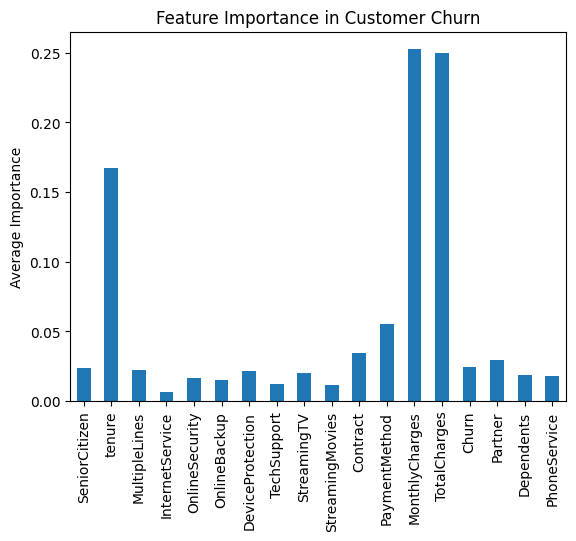

In [38]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis = 0)

rf_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_ylabel('Average Importance')
ax.set_title('Feature Importance in Customer Churn')